In [2]:
%load_ext autoreload
%autoreload 2
%aimport mcfost
%matplotlib inline
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.ticker import LogFormatterExponent
from numpy import unravel_index
import astropy.units as unit
import pysynphot
import os
from sh import gunzip
import os
import math
from sh import gunzip

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
main_dir='/Users/polaris/Onedrive-UA/OneDrive - University of Arizona/Debris-Disk-Modelling/Debris-Disk-Modelling/Eps-eri-Roman_pol/Simulations_paper/SPC_band/'
model='best_SED_Mie/'
file_dir=main_dir+model

In [66]:
res = mcfost.run_one_file(file_dir+'HR4796_best_SED_Mie_Milli.para', wavelengths=[0.78,0.795,0.81,0.825,0.84,0.855,0.87], move_to_subdir=False)

mcfost    : INFO     Running MCFOST for: /Users/polaris/Onedrive-UA/OneDrive - University of Arizona/Debris-Disk-Modelling/Debris-Disk-Modelling/Eps-eri-Roman_pol/Simulations_paper/SPC_band/best_SED_Mie/HR4796_best_SED_Mie_Milli.para
mcfost    : INFO     Computing SED for /Users/polaris/Onedrive-UA/OneDrive - University of Arizona/Debris-Disk-Modelling/Debris-Disk-Modelling/Eps-eri-Roman_pol/Simulations_paper/SPC_band/best_SED_Mie/HR4796_best_SED_Mie_Milli.para
mcfost    : INFO     SED results written to /Users/polaris/Onedrive-UA/OneDrive - University of Arizona/Debris-Disk-Modelling/Debris-Disk-Modelling/Eps-eri-Roman_pol/Simulations_paper/SPC_band/best_SED_Mie/data_th
mcfost    : INFO     Computing image at 0.78 microns for /Users/polaris/Onedrive-UA/OneDrive - University of Arizona/Debris-Disk-Modelling/Debris-Disk-Modelling/Eps-eri-Roman_pol/Simulations_paper/SPC_band/best_SED_Mie/HR4796_best_SED_Mie_Milli.para
mcfost    : INFO     Computing image at 0.795 microns for /Users/polar

In [46]:
model = mcfost.ModelResults(file_dir)
print(model)
print(list(model._wavelengths_lookup.values()))
model.describe()

<MCFOST ModelResults in directory '/Users/polaris/Onedrive-UA/OneDrive - University of Arizona/Debris-Disk-Modelling/Debris-Disk-Modelling/Eps-eri-Roman_pol/Simulations_paper/SPC_band/best_SED_DHS'>
['0.825', '0.78', '0.84', '0.795', '0.855', '0.81', '0.87']
Model results in /Users/polaris/Onedrive-UA/OneDrive - University of Arizona/Debris-Disk-Modelling/Debris-Disk-Modelling/Eps-eri-Roman_pol/Simulations_paper/SPC_band/best_SED_DHS for HR4796_best_SED_DHS_Milli.para
    Model has 1 inclinations from 75.8 to 75.8
    SED computed from 0.1 - 3000.0 microns using 50 wavelengths
    Images computed for 7 wavelengths: [0.825 0.78  0.84  0.795 0.855 0.81  0.87 ] micron


In [47]:
inc=model.images['0.78']
px=256
py=256
psf_scale=0.0208 ##arcsecs/pixel
xpix=(np.arange (-px/2, px/2, 1))*psf_scale
ypix=(np.arange (-px/2, px/2, 1))*psf_scale
sq_as_per_pix=psf_scale**2
c=2.99792*10**14
lam=0.78 #in microns#
jy=10**26
sst=np.reshape(inc.data[5,0],(px,py))
sst_jy=(sst/c)*(lam)*jy
np.max(sst_jy)

1.717712866784558e-05

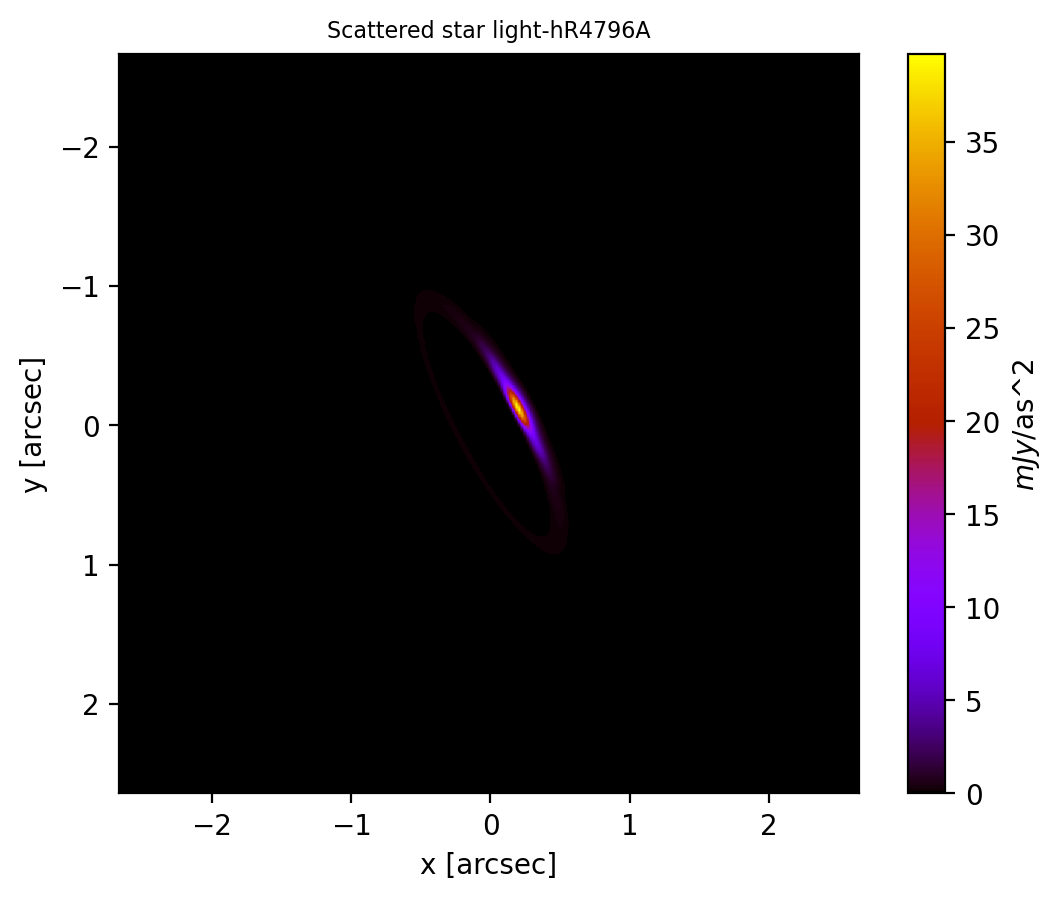

In [48]:
fig=plt.figure(dpi=200)
ax2=plt.subplot(111)
im2=ax2.imshow(sst_jy.astype(np.float64)/sq_as_per_pix*1000,
               cmap='gnuplot',extent=[np.min(ypix),np.max(ypix),np.min(xpix),np.max(xpix)])
ax2.invert_yaxis()
ax2.set_ylabel('y [arcsec]')
ax2.set_xlabel('x [arcsec]')
ax2.set_title('Scattered star light-HR4796A',fontsize=8)
cb=plt.colorbar(im2,orientation='vertical')
cb.set_label("$mJy$/as^2")